In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["DATAVERSE_URL"] = "https://darus.uni-stuttgart.de"
os.environ["DATAVERSE_API_TOKEN"] = ""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GSIB Report: {Method name}

## 1. Method: 

### Description:

TBD

### Sources:

[1]: Kalman et al

### Assumptions:
We assume ergodicity


### Settings & Parameters:

1. Number of MCMC samples: 
    Nmc = 100 [1]
    
2. etc. 

### Reproducibility:



In [11]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Button, Layout
style = {'description_width': 'initial'}

# Create an empty DataFrame with desired headers
headers = ['Points', 'Explanation']
rows = ['instrusiveness', 'F.A.I.R.']
data = pd.DataFrame(index=rows, columns=headers)

# Create the interact function to display the table widget
def create_table(points_instrusiveness, explanation_instrusiveness, points_far, explanation_far):
    data.loc['instrusiveness', 'Points'] = points_instrusiveness
    data.loc['instrusiveness', 'Explanation'] = explanation_instrusiveness
    data.loc['F.A.I.R.', 'Points'] = points_far
    data.loc['F.A.I.R.', 'Explanation'] = explanation_far
    display(data)



Summary (For a more detailed explanation, check Chapter 3.1)
1. Intrusiveness: 
    * 0.0 Points: Just forward call, with parameter modification
    * 0.5 Points: Adjusted parameters for forward calls, but no source code change
    * 1.0 Points: Forward code change required
2. F.A.I.R: 4 times 0.25 points can be achieved by:
    * Software accessible with DOI
    * Documentation meets domain-relevant community standard
    * Output data FAIR (type and format)
    * Valid and clear (open source) Licenses
    
These points are then subtracted from 1.

In [12]:
# Create the table widget using interact
table_widget = widgets.interact(
    create_table,
    points_instrusiveness=widgets.Text(description='Points - Instrusiveness',style=style),
    explanation_instrusiveness=widgets.Text(description='Explanation - Instrusiveness',style=style),
    points_far=widgets.Text(description='Points - F.A.I.R.',style=style),
    explanation_far=widgets.Text(description='Explanation - F.A.I.R.',style=style)
)

,Points,Explanation
instrusiveness,,
F.A.I.R.,,


interactive(children=(Text(value='', description='Points - Instrusiveness', style=TextStyle(description_width=…

## 2. Benchmark selection:
[Explain and reason your choices]

The EnKf method is suitable for ... therefore we tested all scenarios. 



In [13]:
import os
import re
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from geostatbench import BayesInvBench, parula_map

# Define the folder path you want to scan
folder_path = './data'

scenarios = ["S0", "S1", "S2", "S4"]

# Function to map folder names to scenario labels based on regex patterns
def map_to_scenario(folder_path):
    folder_name = Path(folder_path).name
    for pattern, label in pattern_labels.items():
        if re.search(pattern, folder_name):
            return (label, folder_path)
    return None


select_multiple = widgets.SelectMultiple(
    options=scenarios,
    description='Hold "ctrl" to load multiple scenarios:',
    disabled=False,
    style=style
)

# Function to handle the selection change event
def on_select_multiple_change(change):
    selected_scenarios = change['new']
    print("Selected scenarios:", selected_scenarios)


    # Retrieve selected scenarios from the SelectMultiple widget
    selected_scenarios = select_multiple.value
    print("Selected scenarios:", selected_scenarios)

# Attach the function to the SelectMultiple widget's observe event
select_multiple.observe(on_select_multiple_change, names='value')

# Display the SelectMultiple widget
display(select_multiple)

SelectMultiple(description='Hold "ctrl" to load multiple scenarios:', options=('S0', 'S1', 'S2', 'S4'), style=…

## 2.5 Calculate metrics



In [6]:
blist = []
bplots = []
dois = ['doi:10.18419/darus-2382','doi:10.18419/darus-2433','doi:10.18419/darus-2464','doi:10.18419/darus-2460','doi:10.18419/darus-2465']
import pathlib
# Loop through the selected scenarios
for (i, scene) in enumerate(select_multiple.value):
    print(scene)
    doi = dois[i]
    print(doi)
    benchmark = BayesInvBench(DOI=doi)
    blist.append(benchmark)
    blist[i].scenario_name = scene

    # Check if the reference data directory exists
    if os.path.exists(pathlib.Path.joinpath(benchmark.current_dir, "data",f"ref_{scene}")):
        blist[i].data_directory = pathlib.Path.joinpath(benchmark.current_dir, "data")
    else:
        # If the reference data directory does not exist, download the files
        blist[i].download_data_in_background()
        print("Needed to download files, try again :)")



In [185]:
# Loop through the selected scenarios again
for (i, scene) in enumerate(select_multiple.value):  
    blist[i].scenario_name = scene
    
    # Check if the reference data directory exists
    if os.path.exists(pathlib.Path.joinpath(benchmark.current_dir, "data",f"ref_{scene}")):
        blist[i].data_directory = pathlib.Path.joinpath(benchmark.current_dir, "data")
        blist[i].set_replication_name("rep_S0_EnKF_steady_state")
        # Set reference path
        blist[i].set_reference_path()
        # Set reference chain file paths
        blist[i].set_reference_chain_file_paths()
        # Prepare reference data
        blist[i].prepare_reference_data()
        # Plot reference mean field
        p_mf_ref = blist[i].plot_ref_mean_field()
        # Set replication name

        # Load replication data
        blist[i].load_replication_data()
        # Plot replication mean field
        p_mf_rep = blist[i].plot_rep_mean_field()
        # Make comparison plot and get figure and table
        f, table = blist[i].make_comparison_plot()
        # Append plots to bplots list
        bplots.append([p_mf_ref,p_mf_rep,f])

2023-09-05 15:29:17 [INFO] geostatbench - S01_reference_observations.out
2023-09-05 15:29:17 [INFO] geostatbench - S0_chain1_01.h5
2023-09-05 15:29:17 [INFO] geostatbench - S0_chain1_02.h5
2023-09-05 15:29:17 [INFO] geostatbench - S0_chain1_03.h5
2023-09-05 15:29:17 [INFO] geostatbench - S0_chain2_02.h5
2023-09-05 15:29:17 [INFO] geostatbench - S0_chain2_01.h5
2023-09-05 15:29:18 [INFO] geostatbench - S4b_EnKF.out
2023-09-05 15:29:19 [INFO] geostatbench - Load replication file. Assumed there is only one file.
2023-09-05 15:29:19 [INFO] geostatbench - Plot the first chain image.
2023-09-05 15:29:30 [INFO] geostatbench - S4b_EnKF.out
2023-09-05 15:29:32 [INFO] geostatbench - Load replication file. Assumed there is only one file.


/shome/nils_w/Gits/ls3_geo_stat_bench/geostatbench/geostatbench.py:1124: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



2023-09-05 15:29:38 [INFO] geostatbench - Start calculating metrics
2023-09-05 15:29:38 [INFO] geostatbench - RMSE mean: 0.9992590825512101
2023-09-05 15:29:39 [INFO] geostatbench - RMSE mean prior: 1.3641489005881888
2023-09-05 15:29:39 [INFO] geostatbench - Normalized RMSE mean: 0.7325146705908374
2023-09-05 15:29:39 [INFO] geostatbench - Transformed Normalized RMSE mean: 0.42280431041950645
2023-09-05 15:29:41 [INFO] geostatbench - RMSE std: 0.3577546026210422
2023-09-05 15:29:43 [INFO] geostatbench - RMSE std prior: 0.5576283523735329
2023-09-05 15:29:43 [INFO] geostatbench - Normalized RMSE std: 0.6415645852623303
2023-09-05 15:29:43 [INFO] geostatbench - Transformed Normalized RMSE std: 0.39082506471093553
2023-09-05 15:29:43 [INFO] geostatbench - MAE mean: 0.773093475197637
2023-09-05 15:29:43 [INFO] geostatbench - MAE mean prior: 1.034349530184813
2023-09-05 15:29:43 [INFO] geostatbench - Normalized MAE mean: 0.7474199510290339
2023-09-05 15:29:43 [INFO] geostatbench - Transfor

In [186]:
for blista in blist:
    display(blista.bench_df)


,Original,Normalized,TNormalized
RMSE mean,0.999259,0.732515,0.422804
RMSE std,0.357755,0.641565,0.390825
MAE mean,0.773093,0.747420,0.427728
MAE std,0.282536,0.577881,0.366239
KS distance,0.253050,0.253050,0.253050
Energy distance,6.910909,0.314857,0.314857


## 3. Simulation results: 

For each of the selected scenarios, provide $\mathbb{E}(\ln{(K)})$ and $\mathrm{std}(\ln{(K)})$ as well as  $\mathbb{E}(p)$ and $\mathrm{std}(p)$ plots.


For Scenario 1 we get the following results -- 2 D plots with legend

$\mathbb{E}(ln K(x))$ ~~ Include image here

$\text{std}(ln K(x))$

$\mathbb{E}(p(x))$

$\text{std}(p(x))$



For Scenarios 2 - 3, please see Appendix 1.




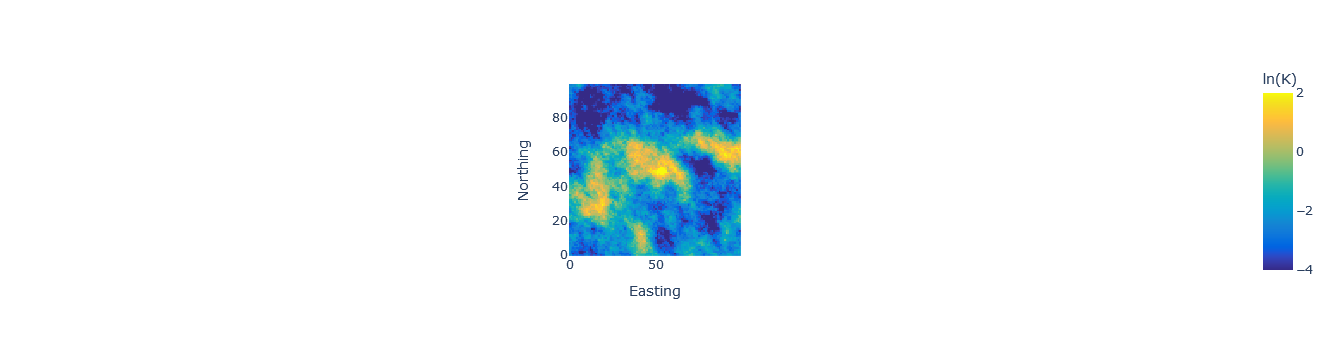

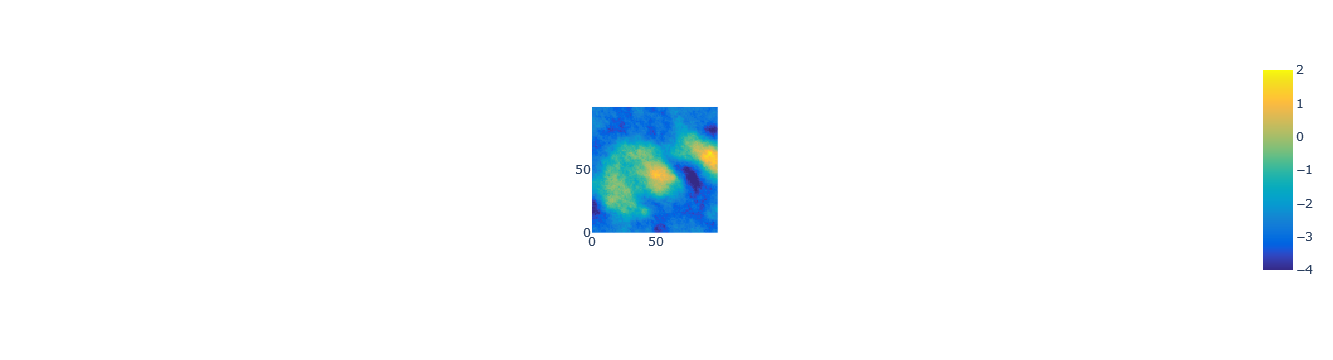

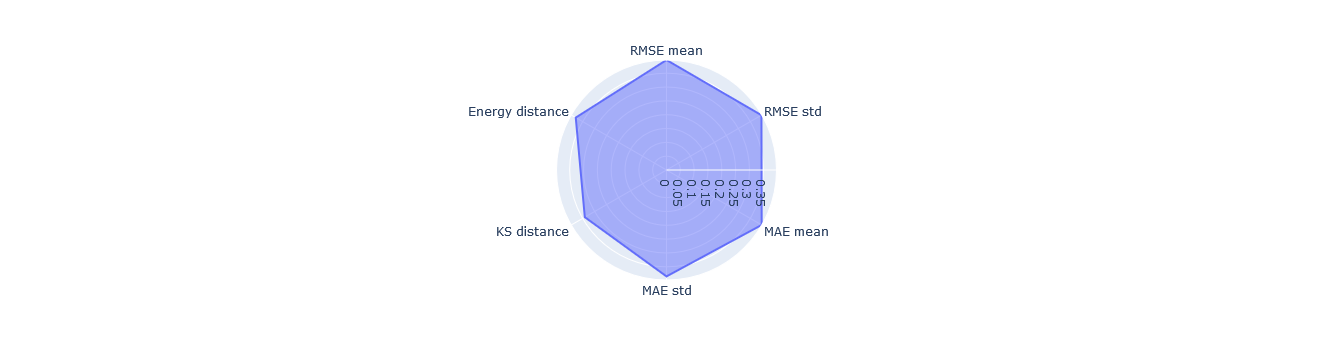

In [126]:
for p in bplots:
    for pp in p:
        display(pp)

In [182]:
def plot_stem_from_table(table,name,ymin=0.2,ymax=0.5):
    # Sample data
    categories = table.index.tolist()
    values = np.round(table['TNormalized'].tolist(),3)
    print(values)
    # Create a figure and axis with a MATLAB-compatible theme
    plt.style.use('seaborn-v0_8-ticks')  # Apply MATLAB-like theme
    fig, ax = plt.subplots(figsize=(7, 2))

    # Plot the stem plot


    markerline, stemlines, baseline = ax.stem(categories, values,markerfmt='x', linefmt = '--',label=name)
    # Customize marker properties
    markerline.set_markerfacecolor('b')
    markerline.set_markeredgecolor('b')
    markerline.set_markersize(8)
    # Sample data

    # Set y-axis limits


       # Set y-axis limits
    ax.set_ylim(0, ymax)

    # Set gridlines
    ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed style

    # Set font sizes for labels
    ax.set_xticklabels(categories, fontsize=8, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
    # plt.xticks(rotation=45)

    # Specify ytick positions and labels, and adjust font size
    ytick_positions = np.arange(ymin, ymax, 0.1)
    ytick_labels = [f'{val:.1f}' for val in ytick_positions]
    ax.set_yticks(ytick_positions)
    ax.set_yticklabels(ytick_labels, fontsize=11, fontfamily='sans-serif')  # Adjust fontsize for ytick labels

    # ax.set_xlabel('Categories', fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
    # ax.set_ylabel('Values', fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system

    # Save the figure as a PDF file
    return fig

## 4. Metrics for accuracy

In [183]:
plot_stem_from_table(blist[0].bench_df,"rep_S4_EnKF")
# Save the figure as a PDF file
plt.savefig('figures/stem_plot_rep_S4_EnKF_1000.pdf', format='pdf', bbox_inches='tight')

plt.show()

[0.398 0.396 0.397 0.385 0.341 0.379]


/tmp/ipykernel_2132547/417982495.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



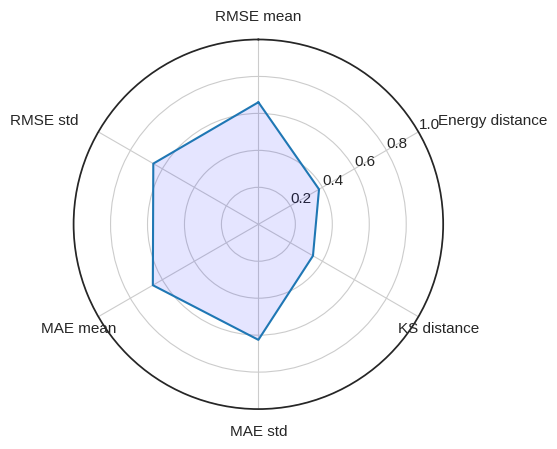

In [171]:
from geostatbench import radar_plot
categories = blist[0].bench_df.index.tolist()
# categories
values = blist[0].bench_df['Normalized'].to_numpy()
fig, ax = radar_plot(categories, values, [0,1])
import matplotlib
# matplotlib.pyplot.close()
fig.savefig("figures/radar_plot_rep_S4_EnKF_1000.pdf")
fig
# plt.show()
# # Spider plot
# bplots[0][2].write_image("radar_plot.pdf")
# bplots[0][2]

Method KPIs:

Quality:

|      | S1     | S2     |
|------|--------|--------|
| MAE  | [value] | [value] |
| NMAE* | [value] | [value] |
| RMSE | [value] | [value] |
| NRMSE* | [value] | [value] |
| AESD | [value] | [value] |
| NAESD* | [value] | [value] |
| ADks | [value] | [value] |
| De | [value] | [value] |
| NDe* | [value] | [value] |
| PSRF | [value] | [value] |

Computational aspects:

|      | S1     | S2     |
|------|--------|--------|
| Nf   | [value] | [value] |
| LNf*  | [value] | [value] |
| To%  | [value] | [value] |
| S%   | [value] | [value] |
| Ls%  | [value] | [value] |



## 5. Metrics for computing costs

1. Magnitude number of forward calls $\mathrm{LN}_f = \log_{10} (N_f)$
2. Overhead wallclock time $T_o$:  $      T_{o\%}=\frac{T_w - T_f}{T_w}$
3. Mutli- {core/thread} speeup loss  $L_{s\%}=1-\frac{K}{N}$

In [205]:
 f = lambda x: x / (1 + x)
data_table3 = {
    '': [ 'LNf*', 'To%'], # 
    'EnKF': [ f(np.log(1000)), 0.451 ],# None
}

df_table3 = pd.DataFrame(data_table3)
df_table3

,,EnKF
0,LNf*,0.873542
1,To%,0.451000


In [214]:
def plot_stem_from_table(categories,values,name="To be set."):
    # Sample data

    print(values)
    # Create a figure and axis with a MATLAB-compatible theme
    plt.style.use('seaborn-v0_8-ticks')  # Apply MATLAB-like theme
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the stem plot


    markerline, stemlines, baseline = ax.stem(categories, values,markerfmt='x', linefmt = '--',label=name)
    # Customize marker properties
    markerline.set_markerfacecolor('b')
    markerline.set_markeredgecolor('b')
    markerline.set_markersize(8)
    # Sample data

    # Set y-axis limits


    # Set gridlines
    ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed style

    ax.set_xticklabels(categories, fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
    ax.set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2), fontsize=11, fontfamily='sans-serif')  # Adjust fontsize for ytick labels
    # ax.set_xlabel('Categories', fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
    # ax.set_ylabel('Values', fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system

    # Adjust legend label font size
    ax.legend(fontsize=11)
    ax.set_ylim(0, 1.1)
    # Save the figure as a PDF file
    return fig



[0.8735418630546294, 0.451]


/tmp/ipykernel_2132547/1576074402.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_2132547/1576074402.py:26: UserWarning:

FixedFormatter should only be used together with FixedLocator



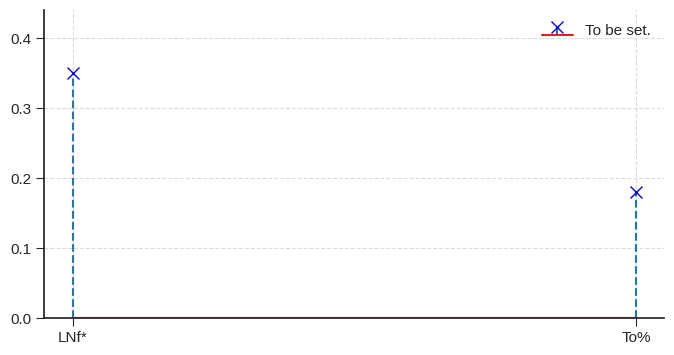

In [216]:
categories = df_table3['']

values = df_table3['EnKF'].tolist()
# # Call the radar_plot function with categories and values
plot_stem_from_table(categories,values)
# # Show the radar plot


## 5. Discussion


1. Strenght and weeknesses



## 6. Appendix:

S2 ... .